<a href="https://colab.research.google.com/github/steffiangel/ml_lab/blob/main/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Library_and_data_loading'></a>
## **1. Library and data loading** ##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV



from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from mlxtend.classifier import StackingClassifier




In [ ]:
train_df = pd.read_csv('/content/survey.csv')

train_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
print(train_df.shape)

print(train_df.describe())

print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

The dataset contains of 27 columns, of which one is integer type and the rest are string type.

<a id='Data_cleaning'></a>
## **2. Data cleaning** ##

In [ ]:
train_df.isnull().sum()


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Text(0.5, 1.0, 'Number of Missing Values')

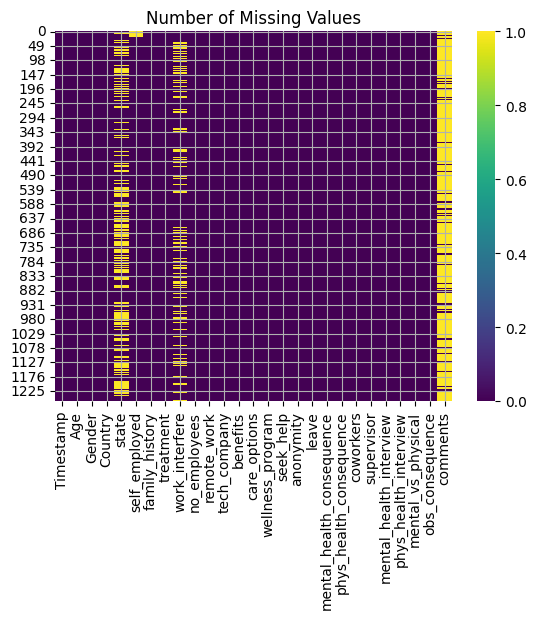

In [ ]:
sns.heatmap(train_df.isnull(),cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
df_year = pd.to_datetime(train_df["Timestamp"]).dt.year
df_year.unique()

array([2014, 2015, 2016])

the dataset contians missing values but no duplicates

In [ ]:
#dropping the columns comments,state and time stamp
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Cleaning NaN**

In [ ]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Text(0.5, 1.0, 'Number of Missing Values')

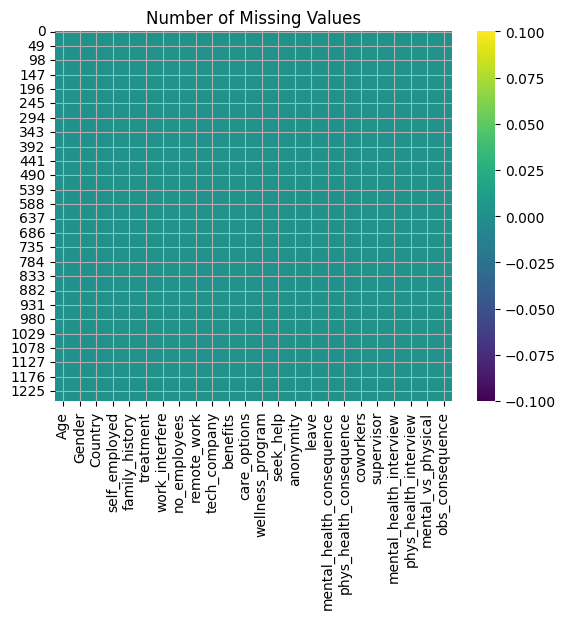

In [ ]:
sns.heatmap(train_df.isnull(),cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

<Axes: >

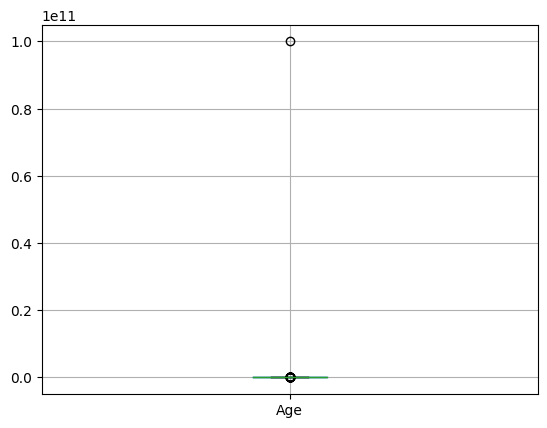

In [ ]:
train_df.boxplot()

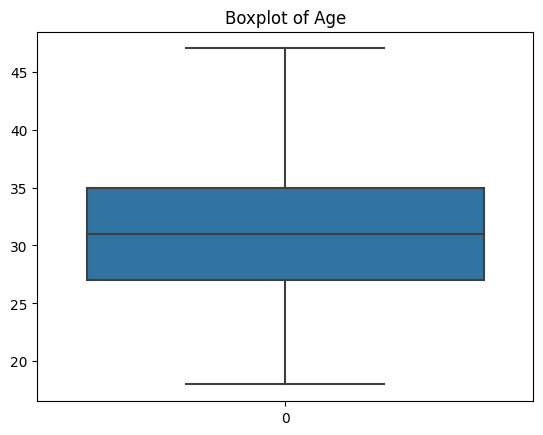

In [ ]:
#handling outliers
for i in train_df['Age']:
    q1=train_df['Age'].quantile(0.25)
    q3=train_df['Age'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          train_df['Age']= train_df['Age'].replace(i,np.median(train_df['Age']))
sns.boxplot(train_df['Age'])
plt.title("Boxplot of Age")
plt.show()

In [ ]:
train_df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 20, 47])

<Axes: >

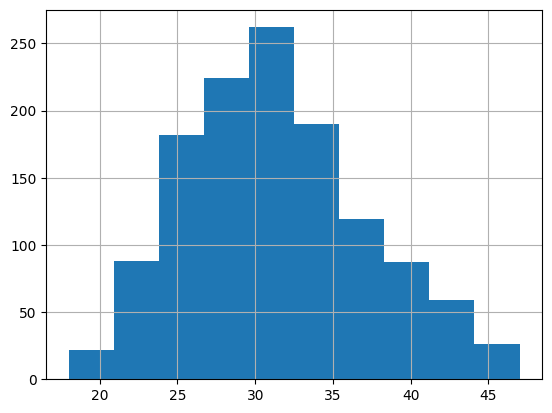

In [ ]:
train_df["Age"].hist()

The plot shows the distribution of age groups in the it sector. We can infer that employee often leaves the industry after the age of 30. This can contribute to the fact where stress in the IT industry affects individual where they prefer working in other domain to get an income.

In [ ]:
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
#clean 'Gender'

gender = train_df['Gender'].str.lower()

gender = train_df['Gender'].unique()

male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)


stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]


train_df = train_df[~train_df['Gender'].isin(trans_str)]
train_df = train_df[train_df['Gender'] != 'trans']

# Display the unique 'Gender' values after dropping
print(train_df['Gender'].unique())


['female' 'male']


The error entries of gender are corrected and classified as female or male

In [ ]:

train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [ ]:

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


The missing values of self_Employed and work_interfere are replaced by 'NO' and 'Don't know'

<a id='Encoding_data'></a>
## **3. Encoding data**

In [ ]:
#Encoding data
labelDict = {}
for col in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[col])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[col] = le.transform(train_df[col])
    # Get labels
    labelKey = 'label_' + col
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)





label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
label_Gender ['female', 'male']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_r

The key categorical entries are lisited out and encoded for further analysis

In [ ]:
#Removing 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,26,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,14,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,13,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,13,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


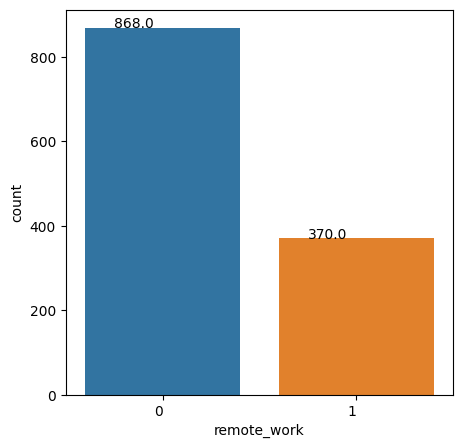

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='remote_work', data=train_df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

By using this plot we can analyze that most of the IT industry contains more in-Office employees. They have a need for employees and at the same time they prefer to work more on developing the company brand more hence many employees have the trouble of working late or are unable to balance their work and family.We can assume that people prefer WFH have more efficient work hence the company should encourage this approach.



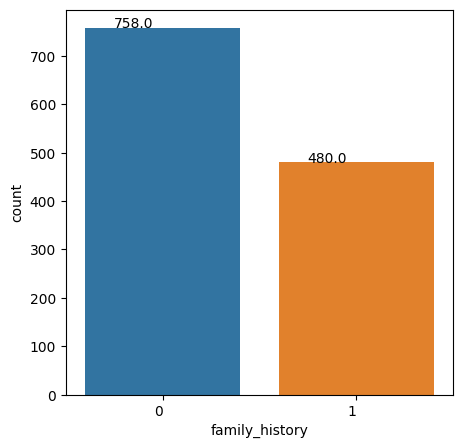

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='family_history', data=train_df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

The plot lets us know that not majority of the employee have no family inherited mental health issue but may tend to develop one during the tenure in the industry

<a id='Covariance_Matrix'></a>
## **4. Covariance Matrix. Variability comparison between categories of variables**

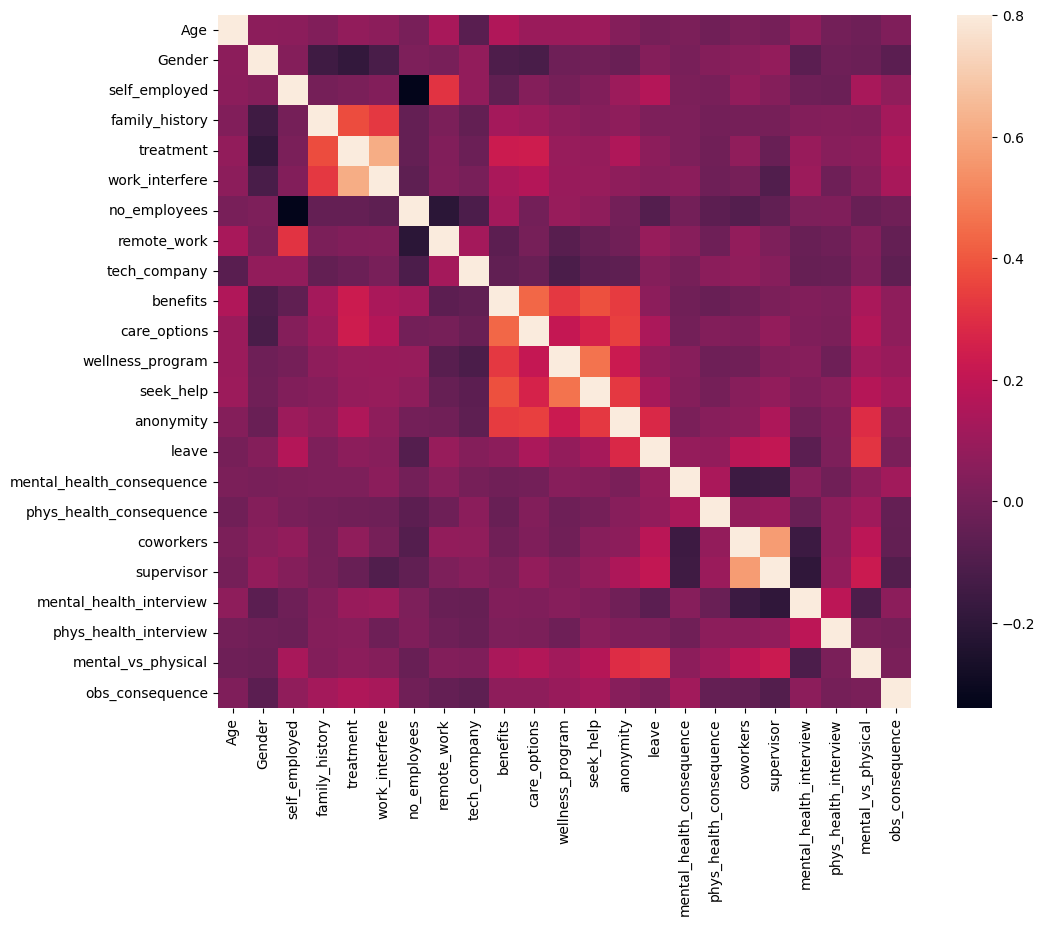

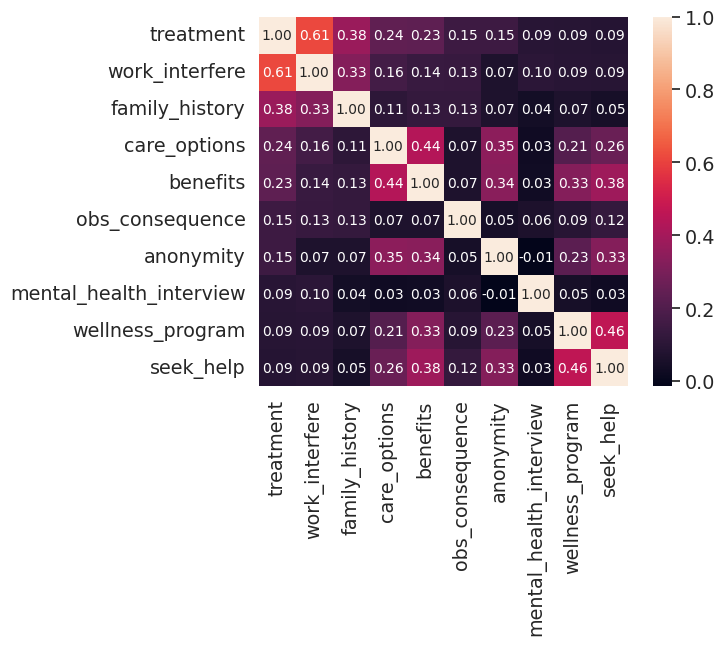

In [ ]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



The covariance matrix helps us know the relationship between the features of the dataset.


<a id='Some_charts_to_see_data_relationship'></a>
## **5. Some charts to see data relationship**

Distribiution and density by Age

Text(0.5, 16.944444444444436, 'Age')

<Figure size 1200x800 with 0 Axes>

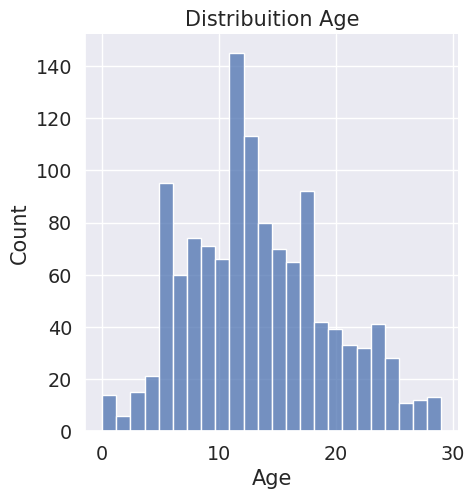

In [ ]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.displot(train_df["Age"], bins=24)
plt.title("Distribuition Age")
plt.xlabel("Age")



Separate by treatment

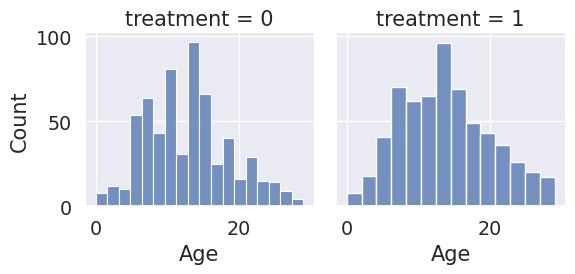

In [ ]:

g = sns.FacetGrid(train_df, col='treatment')
g = g.map(sns.histplot, "Age")


How many people has been treated?

Text(0.5, 1.0, 'Total Distribuition by treated or not, by Gender')

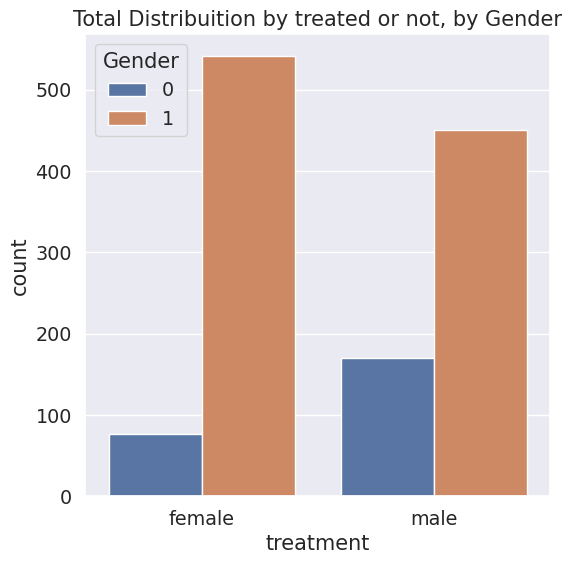

In [ ]:


plt.figure(figsize=(6,6))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", hue="Gender", data=train_df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not, by Gender')


The plot indicates that more females have been treated, this may be due to their emotional weakness compared to the male.The male employees tend to check their mental health less

In [ ]:
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19,0,0,0,1,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,26,1,0,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,14,1,0,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,13,1,0,1,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,13,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


Draw a nested barplot to show probabilities for class and sex

In [ ]:
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

<ipython-input-29-d92af2db2278>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


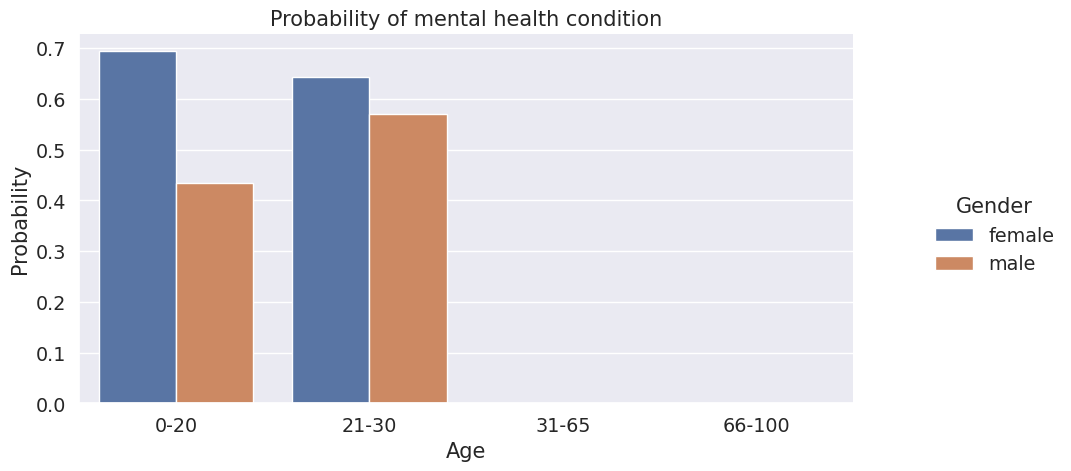

In [ ]:


labelDict['age_range_labels'] = ["0-20", "21-30", "31-65", "66-100"]

o = labelDict['age_range_labels']
g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


This distribution shows the no. of male and female employees who have gone through treatment between the age groups 0-20 and 21-30.
The data indicates that the feshers find it difficult to cope to the IT industry expectation and that majority employees have left the orgainzation due to stress.

Barplot to show probabilities for family history

<ipython-input-30-1ecd4736df66>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


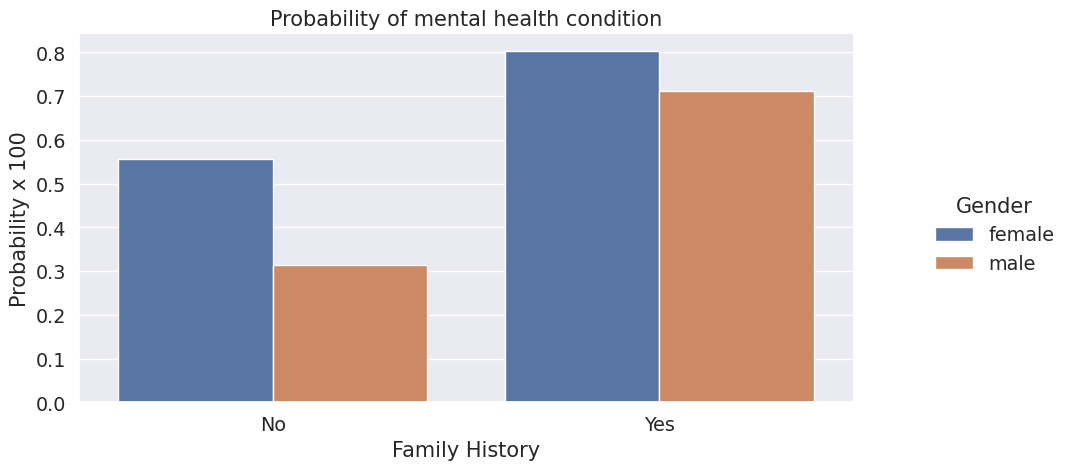

In [ ]:
o = labelDict['label_family_history']

g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for care options

<ipython-input-31-3a1248dfd831>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


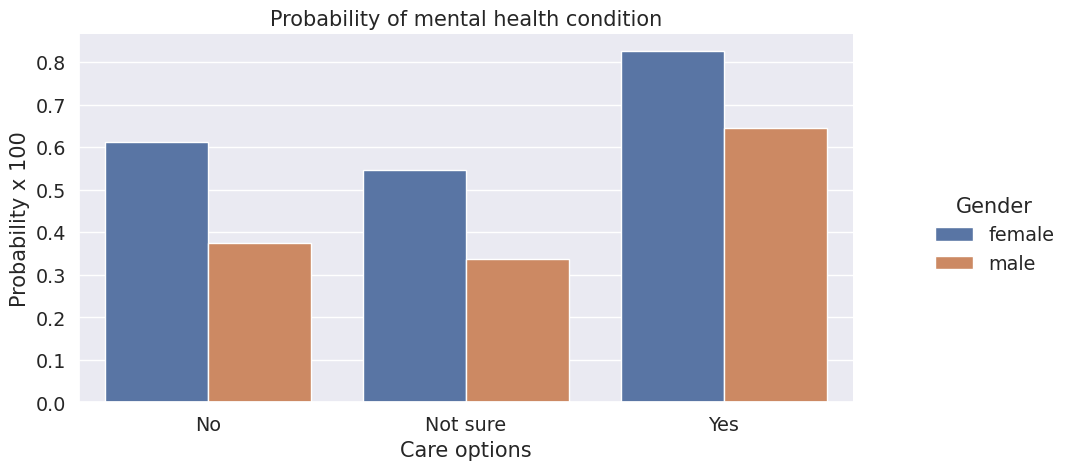

In [ ]:
o = labelDict['label_care_options']

g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')


new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)


g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


The data states that people hesitate to ask for help and that many individuals in the industry require mentsl healthcare services by providing services in each branch like and healthcare center. The company employees work will become more efficient.

Barplot to show probabilities for benefits

<ipython-input-32-e8dd35de6b7f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


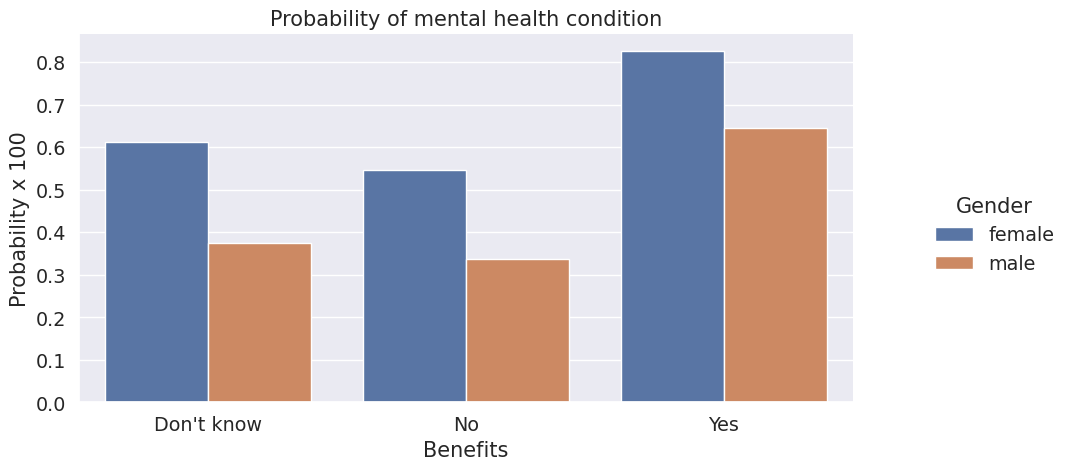

In [ ]:
o = labelDict['label_benefits']

g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


This plot shows if the investment in a mental healthcare service will be helpful or benefit the organization.Yes it will.

Barplot to show probabilities for work interfere

<ipython-input-33-3836870762af>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


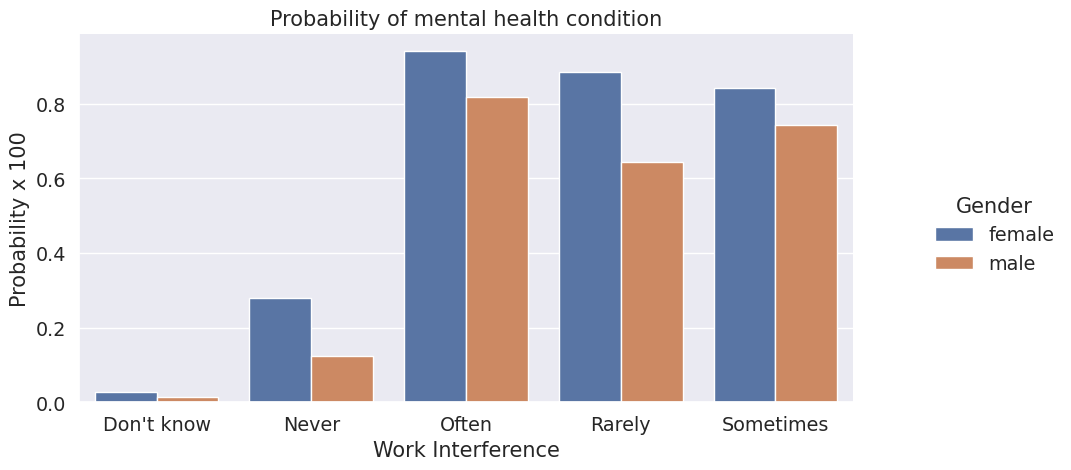

In [ ]:
o = labelDict['label_work_interfere']

g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interference')


new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


The plot shows that majority feels that mental health issues affects their work and there is an essential need of a care center related to this domain in the Organization.

<a id='Scaling_and_fitting'></a>
## **6. Scaling and fitting** ##



Features Scaling
We're going to scale age, because is extremely different from the other ones.

In [ ]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.655172,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,0-20
1,0.896552,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,21-30
2,0.482759,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,0-20
3,0.448276,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,0-20
4,0.448276,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,0-20


Spliltting the dataset

In [ ]:

feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

methodDict = {}
rmseDict = ()



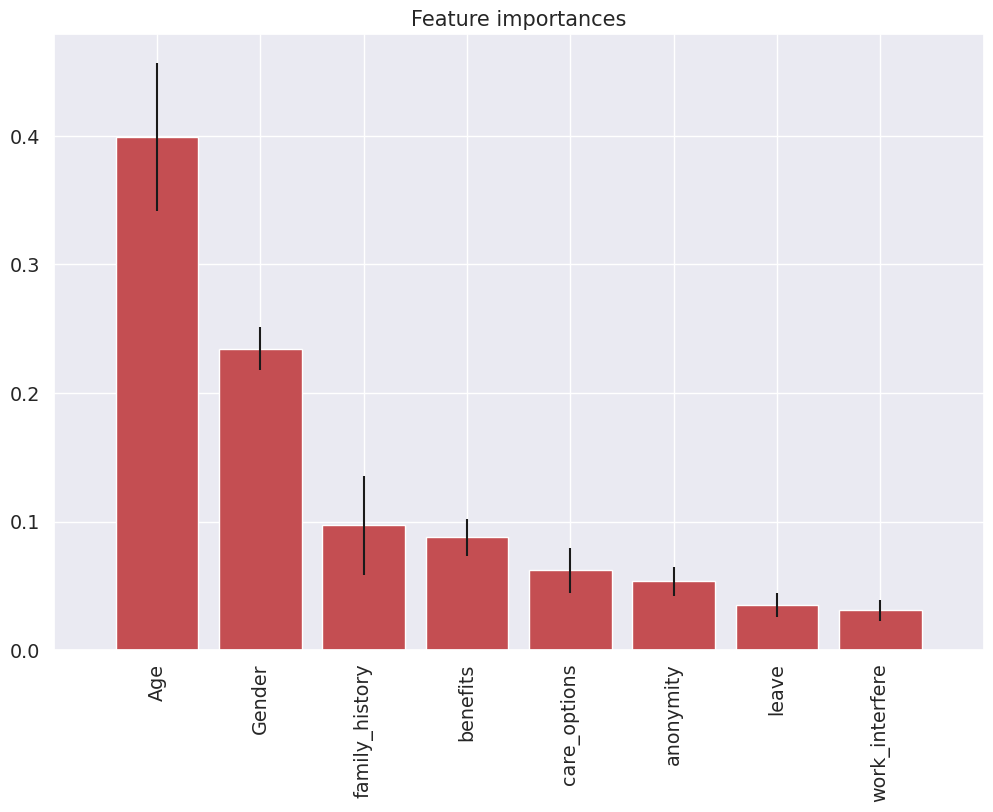

In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

Created Random Forest classifier (ExtraTreesClassifier) with 250 decision trees in the forest.

After fitting, it calculates the feature importances for each feature in the dataset using the Random Forest model.It computes the standard deviation of feature importances across all decision trees in the forest, providing a measure of the stability or consistency of feature importance rankings.It sorts the feature importances in descending order and retrieves the corresponding indices.

It creates a bar plot to visualize the feature importances, with features on the x-axis and their importance values on the y-axis.

Summary: We bulid a Random Forest classifier, determines feature importances, and visually presents the relative importance of each feature in your dataset.

<a id='Tuning'></a>
## **7. Tuning**
### **Evaluating a Classification Model.** <br>



In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):

    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:',1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)


    print('Precision:', metrics.precision_score(y_test, y_pred_class))


    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))


    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    model.predict_proba(X_test)[0:10, 1]


    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:

        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)


        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')


    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]


    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])


    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()


    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)



    return accuracy

The function is designed to evaluate a binary classification model and provide various performance metrics.
* metrics.accuracy_score: Calculates and prints the accuracy of the model's predictions.

* y_test.value_counts(): Displays the distribution of actual class labels in the test set.

* Calculates and prints the percentage of ones and zeros in the test set.

* metrics.confusion_matrix: Computes and displays the confusion matrix, which contains information about true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

* Visualizes the confusion matrix using a heatmap.


* Classification Accuracy: The proportion of correct predictions.
* Classification Error: The proportion of incorrect predictions.
* False Positive Rate: The rate of false positives when the actual value is negative.
* Precision: The proportion of true positive predictions out of all positive predictions.
* roc_auc_score: Calculates and prints the AUC (Area Under the ROC Curve) score.

* Cross-validated AUC: Computes and prints the AUC score using cross-validation.

* plt.hist: Plots a histogram of the predicted probabilities of class membership.

* Adjusts the classification threshold to 0.3 and prints the first 10 predicted probabilities after adjusting the threshold.

* Calculates and plots the ROC curve and computes the AUC score for the ROC curve.

* Calculates and prints a new confusion matrix based on a threshold of 0.50.

* Returns the accuracy score of the model.

The function provides the evaluation of the classification model's performance, including accuracy, ROC analysis, and confusion matrix visualization.

### **Tuning with cross validation score**

In [ ]:

def tuningCV(knn):


    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)

    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()


The tuningCV function performs hyperparameter tuning for a k-Nearest Neighbors (KNN) classifier.

Creates a new KNN classifier with n_neighbors set to the current k.
Performs 10-fold cross-validation (cv=10) on the KNN classifier, measuring accuracy (scoring='accuracy') as the evaluation metric.
Appends the mean accuracy score obtained from cross-validation to the k_scores list.

After evaluating accuracy scores for different values of k, we plots a line graph to visualize how the cross-validated accuracy changes with different values of k. The x-axis represents the values of k, and the y-axis represents the cross-validated accuracy.


It helps us choose an optimal value of n_neighbors for your KNN classifier by observing how accuracy changes with different values of k.

### **Tuning with GridSearchCV** ###

In [ ]:
def tuningGridSerach(knn):

    k_range = list(range(1, 31))
    print(k_range)

    param_grid = dict(n_neighbors=k_range)
    print(param_grid)


    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')


    grid.fit(X, y)


    grid.grid_scores_


    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)


    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)

    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)


The tuningGridSearch function performs K-nearest neighbors (KNN) classifier hyperparameter tuning using GridSearchCV:

It searches for the best hyperparameters for the KNN classifier through an exhaustive grid search with 10-fold cross-validation and accuracy scoring.

A plot is generated, displaying the relationship between the number of neighbors (k) and cross-validated accuracy.

Information about the best model, including the best score and hyperparameters, is printed to identify the optimal KNN configuration.


In [ ]:
def tuningRandomizedSearchCV2(model, param_dist):

    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)


    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    cv_results = rand.cv_results_


    for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
        print("Mean Test Score:", mean_score)
        print("Parameters:", params)


    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)


The tuningRandomizedSearchCV2 function is for hyperparameter tuning using RandomizedSearchCV. It takes a machine learning model and a dictionary of hyperparameter distributions as inputs. It performs 10 random searches for hyperparameters with 10-fold cross-validation and prints the best score and corresponding hyperparameters. It also displays mean test scores for each parameter combination. The function then runs RandomizedSearchCV 20 times, recording the best scores in each iteration to assess hyperparameter stability. It is used for finding optimal hyperparameters for machine learning models.

### **Tuning with RandomizedSearchCV** ###

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):

    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_


    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)


    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

The `tuningRandomizedSearchCV` function conducts hyperparameter tuning using RandomizedSearchCV:

1. It initializes a RandomizedSearchCV object named `rand` with model and hyperparameter distributions, using 10-fold cross-validation, accuracy scoring, and 10 random searches with a fixed random seed (random_state=5).

2. It fits the `rand` object to the data.

3. It runs RandomizedSearchCV 20 additional times (with n_iter=10) to assess the stability of hyperparameter selection, recording the best scores in each iteration and printing them.

### **Tuning with searching multiple parameters simultaneously** ###

In [ ]:
def tuningMultParam(knn):


    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']


    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)


    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)


    print(grid.grid_scores_)


    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

The `tuningMultParam` function performs hyperparameter tuning for a K-nearest neighbors (KNN) classifier using GridSearchCV:

1. It defines a range of values for the number of neighbors (`k_range`) and weighting options ('uniform' and 'distance').

2. It creates a parameter grid dictionary combining these hyperparameters.

3. Initializes a GridSearchCV object with the provided KNN classifier, the hyperparameter grid, 10-fold cross-validation, and accuracy scoring.

4. It fits the GridSearchCV object to the data (assumed to be `X` and `y`).

5. The function prints the grid of scores, the best cross-validated score, and the corresponding best hyperparameters found by the grid search.

<a id='Evaluating_models'></a>
## **8. Evaluating models**<br><br>


<a id='Decision_Tree_classifier'></a>
### Decision Tree classifier

In [ ]:
def treeClassifier():

    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV2(tree, param_dist)

    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)

    y_pred_class = tree.predict(X_test)

    print('########### Tree classifier ###############')

    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    methodDict['Tree clas.'] = accuracy_score * 100

The `treeClassifier` function performs decision tree classification with hyperparameter tuning and evaluation:

1. It tunes the hyperparameters of a Decision Tree classifier using RandomizedSearchCV with predefined search spaces.

2. The best hyperparameters are used to initialize and train a Decision Tree classifier on the training data.

3. The classifier's predictions are made on the testing data, and performance metrics are printed.

4. It records the accuracy score in a dictionary for further analysis.

5. This function is a pipeline for decision tree classification, including hyperparameter tuning and evaluation.

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred_class = (y_pred_prob >= 0.3).astype(int)

    accuracy_score = metrics.accuracy_score(y_test, y_pred_class)



    return accuracy_score


The `evalClassModel` function is designed to evaluate a classification model:

2. The function calculates predicted probabilities and converts them to binary class predictions based on a threshold of 0.3.

3. It then computes the accuracy score, which measures the model's classification accuracy on the test data.

4. The function can also create additional evaluation metrics and plots,if the `plot` flag is set to True.

 The function assess the classification performance of a model and is adaptable for various use cases by adjusting the threshold and including additional evaluation metrics and visualizations.

In [ ]:
treeClassifier()

Rand. Best Score:  0.8295043273013375
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}
Mean Test Score: 0.8213742460005244
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
Mean Test Score: 0.7172960923157619
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 8}
Mean Test Score: 0.8295043273013375
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}
Mean Test Score: 0.7947678992918961
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
Mean Test Score: 0.8295043273013375
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 3}
Mean Test Score: 0.8141817466561762
Parameters: {'criteri

execute the decision tree classification, including hyperparameter tuning, model training, and evaluation, and store the accuracy score.The accuracy score is 0.82


<a id='Random_Forests'></a>
### Random Forests

In [ ]:
def randomForest():

    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV2(forest, param_dist)

    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)


    y_pred_class = my_forest.predict(X_test)

    print('########### Random Forests ###############')

    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)


    methodDict['R. Forest'] = accuracy_score * 100

In [ ]:
randomForest()

Rand. Best Score:  0.8327432467873066
Rand. Best Params:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 4}
Mean Test Score: 0.8295043273013375
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
Mean Test Score: 0.8190466824023078
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 8}
Mean Test Score: 0.8295043273013375
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}
Mean Test Score: 0.8230723839496459
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
Mean Test Score: 0.8295043273013375
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 3}
Mean Test Score: 0.8286978756884341
Parameters: {'criterion'

The `randomForest()` function is used for random forest classification:

1. It initializes a Random Forest classifier with 20 estimators.
It defines a hyperparameter search space dictionary for tuning, including max depth, max features, min samples split, min samples leaf, and criterion.

3. The function performs hyperparameter tuning using RandomizedSearchCV and the `tuningRandomizedSearchCV2` function.

4. It initializes and trains a Random Forest classifier with the best hyperparameters on the training data, makes predictions on the test data, and prints accuracy metrics.
5. The accuray score is 0.82

<a id='Predicting_with_Neural_Network'></a>
## **9. Predicting with Neural Network**


### Create input functions
You must create input functions to supply data for training, evaluating, and prediction.

In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 14.5 MB/s eta 0:00:00


In [ ]:
import tensorflow.compat.v1 as tfv1
import tensorflow as tf

# Define ProximalAdagradOptimizer using TensorFlow v1's optimizer
ProximalAdagradOptimizer = tfv1.train.ProximalAdagradOptimizer

imports TensorFlow v1 as `tfv1`, then defines a custom optimizer, `ProximalAdagradOptimizer`, using TensorFlow v1's optimizer module.*italicised text*

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

batch_size = 100
train_steps = 100


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adagrad',  # Use Adagrad optimizer
              loss='mse',
              metrics=['mae'])


model.fit(X_train, y_train, epochs=1, batch_size=batch_size)


model.evaluate(X_test, y_test, batch_size=batch_size)


4/4 [==============================] - 0s 14ms/step - loss: 0.2544 - mae: 0.4501


[0.2544417977333069, 0.45014700293540955]



1. Imports TensorFlow and Scikit-Learn and sets batch size and training steps.

2. Defines a neural network model with three layers, including one output layer.

3. Compiles the model using the Adagrad optimizer, mean squared error (MSE) loss, and mean absolute error (MAE) metric.

4. Trains the model on training data (`X_train`, `y_train`) for one epoch with a batch size of 100.

5. Evaluates the trained model's performance on test data (`X_test`, `y_test`) using the same batch size and reports the evaluation results, specifically the MSE and MAE.

We define the models we have to want to shortlist


In [ ]:
gender = tf.feature_column.categorical_column_with_vocabulary_list(
    "Gender", ["Male", "Female"])
gender = tf.feature_column.categorical_column_with_vocabulary_list(
    "Gender", ["Male", "Female"])
gender_embed = tf.feature_column.embedding_column(gender, dimension=2)


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
# Define Tensorflow feature columns by grouping them
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


### Instantiate an Estimator
Our problem is a  classification problem. We want to predict whether a patient has to be treated or not. We use tf.estimator.DNNClassifier for deep models that perform multi-class classification.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define your feature columns and load your data as before

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Build a DNN model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(len(feature_columns),)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
eval_result = model.evaluate(X_test, y_test)
print("Loss:", eval_result[0])
print("Accuracy:", eval_result[1])


Epoch 1/10
28/28 [==============================] - 2s 7ms/step - loss: 0.7608 - accuracy: 0.5046
Epoch 2/10
28/28 [==============================] - 0s 5ms/step - loss: 0.7515 - accuracy: 0.5012
Epoch 3/10
28/28 [==============================] - 0s 6ms/step - loss: 0.7456 - accuracy: 0.5012
Epoch 4/10
28/28 [==============================] - 0s 7ms/step - loss: 0.7404 - accuracy: 0.4977
Epoch 5/10
28/28 [==============================] - 0s 7ms/step - loss: 0.7362 - accuracy: 0.4977
Epoch 6/10
28/28 [==============================] - 0s 5ms/step - loss: 0.7329 - accuracy: 0.4977
Epoch 7/10
28/28 [==============================] - 0s 6ms/step - loss: 0.7297 - accuracy: 0.4954
Epoch 8/10
28/28 [==============================] - 0s 5ms/step - loss: 0.7272 - accuracy: 0.4954
Epoch 9/10
28/28 [==============================] - 0s 6ms/step - loss: 0.7251 - accuracy: 0.4965
Epoch 10/10
12/12 [==============================] - 0s 4ms/step - loss: 0.7256 - accuracy: 0.4839
Loss: 0.72560352087

The data is split into training and test sets using train_test_split from Scikit-Learn.

A DNN model is constructed using Keras, consisting of three layers with ReLU activation functions for hidden layers and a sigmoid activation function for the output layer for binary classification.

The model is compiled, trained on the training data, and evaluated on the test data, displaying the loss and accuracy metrics after training.


#### Train the model
The steps argument tells the method to stop training after a number of training steps.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')  # Using sigmoid activation for binary classification
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


Epoch 1/10
9/9 [==============================] - 3s 46ms/step - loss: 0.5719 - accuracy: 0.7090 - val_loss: 0.4379 - val_accuracy: 0.8253
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 0.4323 - accuracy: 0.8152 - val_loss: 0.4052 - val_accuracy: 0.8118
Epoch 3/10
9/9 [==============================] - 0s 13ms/step - loss: 0.4101 - accuracy: 0.8164 - val_loss: 0.4045 - val_accuracy: 0.8118
Epoch 4/10
9/9 [==============================] - 0s 17ms/step - loss: 0.3969 - accuracy: 0.8210 - val_loss: 0.4060 - val_accuracy: 0.8172
Epoch 5/10
9/9 [==============================] - 0s 19ms/step - loss: 0.3985 - accuracy: 0.8141 - val_loss: 0.3956 - val_accuracy: 0.8226
Epoch 6/10
9/9 [==============================] - 0s 16ms/step - loss: 0.3925 - accuracy: 0.8210 - val_loss: 0.3854 - val_accuracy: 0.8280
Epoch 7/10
9/9 [==============================] - 0s 21ms/step - loss: 0.3855 - accuracy: 0.8268 - val_loss: 0.3907 - val_accuracy: 0.8226
Epoch 8/10
9/9 [===========

### Evaluate the trained model
Now that the model has been trained, we can get some statistics on its performance. The following code block evaluates the accuracy of the trained model on the test data.

In [ ]:

eval_result = model.evaluate(X_test, y_test, batch_size=batch_size)


accuracy = eval_result[1] * 100


print('\nTest set accuracy: {accuracy:0.2f}\n'.format(accuracy=accuracy))


methodDict['NN DNNClasif.'] = accuracy


4/4 [==============================] - 0s 9ms/step - loss: 0.3899 - accuracy: 0.8172

Test set accuracy: 81.72



### Making predictions (inferring) from the trained model
We now have a trained model that produces good evaluation results. We can now use the trained model to predict whether a patient needs treatment or not.

In [ ]:
def predict_input_fn(features, batch_size):

    dataset = tf.data.Dataset.from_tensor_slices(dict(features))
    dataset = dataset.batch(batch_size)
    return dataset


The `predict_input_fn` function takes input features as a dictionary, converts them into a TensorFlow dataset, and batches the examples based on the specified batch size. This prepared dataset is intended for making predictions with a TensorFlow model.

In [ ]:
def eval_input_fn(features, labels, batch_size):

    features = dict(features)


    dataset = tf.data.Dataset.from_tensor_slices(features)


    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)


    num_examples = len(features[next(iter(features))])
    if num_examples < batch_size:
        dataset = dataset.repeat()

    return dataset



The eval_input_fn function takes input features and labels, converts them into a TensorFlow dataset, batches the data according to the specified batch size, and repeats the dataset if the number of examples is less than the batch size. This prepared dataset is intended for evaluation

 new code

In [ ]:

feature_columns = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X_train_processed = X_train[feature_columns].values

predictions = model.predict(X_train_processed, batch_size=batch_size)

predicted_labels = [int(prediction[0]) for prediction in predictions]


results = pd.DataFrame({'prediction': predicted_labels, 'expected': y_train})

print(results.head())

9/9 [==============================] - 0s 4ms/step
      prediction  expected
1220           0         1
65             0         0
1243           0         1
579            0         1
1040           0         1


 it generates predictions for the training data, extracts predicted class labels, creates a DataFrame (results) to store the predictions and expected labels, and displays the first few rows of the results.

<a id='Success_method_plot'></a>
## **10. Success method plot**

In [ ]:
#The plotSuccess function is designed to create a bar chart to visualize the success percentages of various methods.
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

    plt.show()

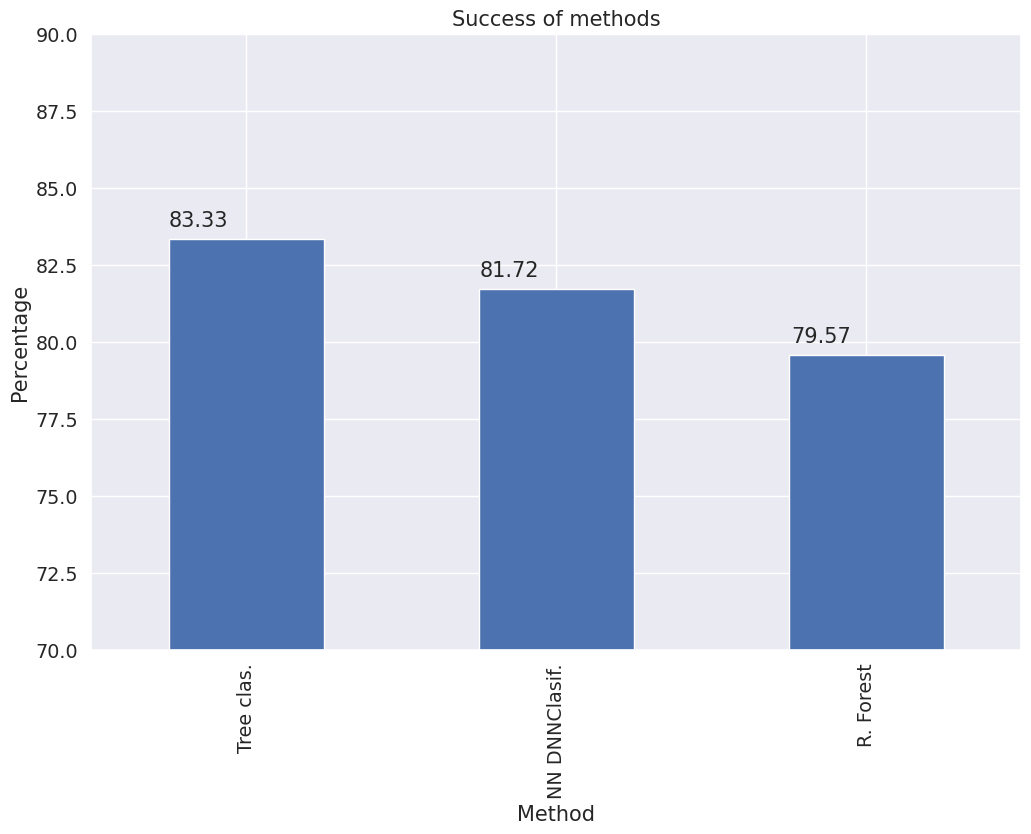

In [ ]:
plotSuccess()